# Logistic regression

Logistic regression is a popular classification technique due to its simplicity, interpretability and performance. 

The goal of this project is to get insight into the following topics:
- Being able to train a logistic regression model.
- Performing hyperparameter tuning.
- Testing and evaluation of the trained model. Being able to assess the model by means of different classification metrics: accuracy, recall, precision, f1-score, ROC.
- Knowing how to deal with underfitting and overfitting.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns # fancy plots

C:\Users\SNtolo\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Wine classification

The dataset *wine_data.csv* consists of chemical parameters of several different wines. Your task is to train a logistic regression model being able to classify these wines by cultivar (wine farmer). In other words can you predict who produced a specific wine?

The column cultivar contains the target values (what you want to predict). For example 1 stands for cultivar 1.

### Reading the dataset and analysis

In [3]:
# Reading the dataset
dataset = pd.read_csv('wine_data.csv')
dataset.head(10)

,inputs Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,Cultivar
0,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625,1
1,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630,1
2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,1
3,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,1
4,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,1
5,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,1
6,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495,1
7,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372,1
8,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,2
9,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,1


Determine the number of classes. In other words, how many different cultivars are in the dataset? 
Is the dataset balanced? Balanced means that the distribution of the targets is more or less uniformly distributed.
For this dataset balanced means that you have approximately the same number wines for each of the cultivars.
You can use the Seaborn countplot for this. https://seaborn.pydata.org/generated/seaborn.countplot.html.
The problem with imbalanced datasets is that the model you train can get a preference for the majority class.

<AxesSubplot:xlabel='Cultivar', ylabel='count'>

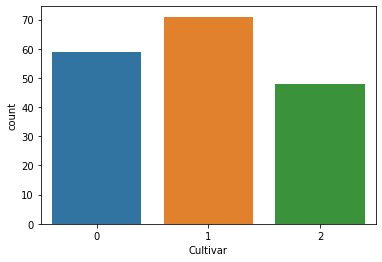

In [4]:
# Number of classes (countplot)
sns.countplot(x = 'Cultivar', data = dataset)

In [7]:
# Statistical analysis of the data
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
inputs Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
MalicAcid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
AlcalinityOfAsh,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
TotalPhenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
NonflavanoidsPhenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
ColorIntensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### Preprocessing and compiling a training set and test set

 Next is to Split into **features and targets**.

In [9]:
# Splitting into features and targets
y = dataset['Cultivar'].values     #Setting Cultivar as target
X = dataset.drop('Cultivar', axis=1).values    # Features
print (y.shape, X.shape)

print(X)

(178,) (178, 13)
[[ 12.08   1.33   2.3  ...   1.07   3.21 625.  ]
 [ 12.08   1.13   2.51 ...   1.31   2.72 630.  ]
 [ 12.37   1.17   1.92 ...   1.12   3.48 510.  ]
 ...
 [ 12.99   1.67   2.6  ...   1.31   3.5  985.  ]
 [ 12.21   1.19   1.75 ...   1.28   3.07 718.  ]
 [ 12.47   1.52   2.2  ...   1.16   2.63 937.  ]]


Create a training set and test set. Make sure that 70 wines end up in the test set.
Use the train_test_split function. More information:http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
# Creating training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70, random_state=0)

In [11]:
X_test.shape

(70, 13)

We now going to Scale the dataset by means of a Standardscaler or MinMax scaler. To read more about this, please check the link for documentation 
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [12]:
# Scaling with standardscaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Lets see our X_train
print (X_train)

[[ 1.5839572  -0.5320314   1.18779565 ... -1.98543036 -1.1051815
  -0.2847604 ]
 [-0.35734832 -1.16704205 -0.53059945 ...  1.11566255  0.66748586
  -0.92199434]
 [-0.43872041 -0.84046515 -1.80071757 ...  0.22292368  0.09136897
  -0.58213624]
 ...
 [-0.79908251 -0.59553247 -0.6426687  ... -0.40669215 -1.31199269
   0.35247353]
 [-0.84558085  2.2257291   0.590093   ... -1.13967775 -2.12446523
  -0.10269356]
 [ 0.90973133 -0.66810511  1.18779565 ...  1.20963507  0.43113021
   1.4600468 ]]


To Train a logistic regression classifier please visit the link and it will give you more documentation about this - (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Initially, we can choose C=1.

Next is to test the trained model on the test set. We then Compute the confusion matrix, accuracy and generate the classification report to see our findings

To Try and improve the accuracy of the model by hyperparameter tuning. Options for hyperparameter tuning are the following:
- Find a good C-value
- Choose a different solver
- Apply L1 or L2 regularization (penalty parameter)
- Polynomial expansion of the features: adding higher order features.
- In case you have an imbalanced dataset you can use the **class_weight=balanced** parameter. Explain the effect of it in terms of accuracy , recall, precision and f1-score.

In [14]:
logreg = LogisticRegression(C=2)
logreg.fit(X_train, y_train)

LogisticRegression(C=2)

In [15]:
# Testing
logreg_pred = logreg.predict(X_test)
print(classification_report(y_test,logreg_pred))
logreg_acc = accuracy_score(logreg_pred, y_test)
print (logreg_acc*100)
print(confusion_matrix(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.96      0.98        24
           2       0.96      1.00      0.98        24

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70

98.57142857142858
[[22  0  0]
 [ 0 23  1]
 [ 0  0 24]]


**C = 100 gives us 97% which is not much different** 

**C = 2000 gives us 96%, decreased by 1**

**C = 2 gives us 99%.. much better!**

**We can conclude than when C value goes up, our prediction goes down**

### Predictions with the trained model

Predict the cultivar for the following wine:

inputs Alcohol: 13.52 - 
MalicAcid: 2.05 - 
Ash: 2.20 - 
AlcalinityOfAsh: 17.3 - 
Magnesium: 120 - 
TotalPhenols: 2.60 - 
flavanoids: 3.52 - 
NonflavanoidsPhenols: 0.30 - 
Proanthocyanins: 2.28 - 
ColorIntensity: 7.80 - 
Hue: 0.77 - 
OD280/OD315: 2.90 - 
Proline: 862


But what is the confidence of our model? Let's use the predict_proba() function to compute this value.

In [17]:
# Prediction
import warnings
warnings.filterwarnings("ignore")

y_pred = logreg.predict(X_test)

In [18]:
logreg.score(X_test,y_test)

0.9857142857142858

**This gives us 98%!! not bad but one can say there is a bit of biased in the model. Also, there might be overfitting maybe.**

Below I will perform some resampling using **Synthetic Minority Oversampling Technique - SMOTE** and see if we can accuractly balance this data


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [20]:
# Using numpy to perform the imbalance count
np.bincount(y_train_res)

array([47, 47, 47], dtype=int64)

**Now we can see that the dataset is accuractly blanced using SMOTE. I will test the model using the resampled dataset for training**

Now I am going to train on a new resampled data using X_res and y_res

In [21]:
lr2 = LogisticRegression()
lr2.fit(X_train_res, y_train_res)

LogisticRegression()

In [22]:
lr2.score(X_train_res,y_train_res)

1.0

In [23]:
from sklearn.preprocessing import LabelEncoder
recall_score_dict = {}
acc_score_dict = {}
precision_score_dict = {}

le = LabelEncoder()
dataset["Cultivar"] = le.fit_transform(dataset["Cultivar"])

In [24]:

logreg1 = LogisticRegression(random_state=0)

#Fitting the training data
logreg1.fit(X_train_res, y_train_res)

#Predicting on test
y_pred1=logreg1.predict(X_test)

In [25]:
# Prediction using inputs:

wine = np.array([[13.52,2.05,2.20,17.3,120,2.60,3.52,0.30,2.28,7.80,0.77,2.90,862]])
wine = scaler.transform(wine)

winefarmer = logreg.predict(wine)

In [26]:
print(winefarmer)

[0]


**It appears that the model thinks the wine belongs to wine farmer 0 with ~98%**


In [27]:
# Interpretation of the coefficients and intercepts
print (logreg.coef_)
print (logreg.intercept_)

[[ 0.86393193  0.17758964  0.505721   -0.58450971  0.13960935  0.27161449
   0.66474254 -0.37873515  0.04601904  0.34022765  0.13060706  0.74995176
   1.1122689 ]
 [-1.12694981 -0.54811899 -0.74249081  0.2815334  -0.15389945  0.13298779
   0.08025884  0.3005742   0.45539586 -1.24386011  0.66755552  0.03562051
  -0.89589149]
 [ 0.26301787  0.37052935  0.2367698   0.30297631  0.0142901  -0.40460228
  -0.74500138  0.07816095 -0.50141489  0.90363246 -0.79816258 -0.78557227
  -0.21637741]]
[ 0.42577416  1.10207206 -1.52784622]


... to be continued

### Author: Siya the LoneWolf